# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [19]:
import numpy as np

#1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

affitti = np.array([720, 980, 650, 1200], dtype=float)
np.array
#2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

spesaTotale = np.sum(affitti)
""" 3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array. """

affitti[affitti == 1200] *= 1.12
""" 4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica. """
    
affitti[affitti == 650] *= 0.9

""" 5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza. """
    
affitti[affitti == 720] *= 1.05
affitti[affitti == 980] *= 1.05


#7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

newSpesMensile = np.sum(affitti)

""" 8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.) """
    
confrontoSPesa = spesaTotale - spesaTotale+144

## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

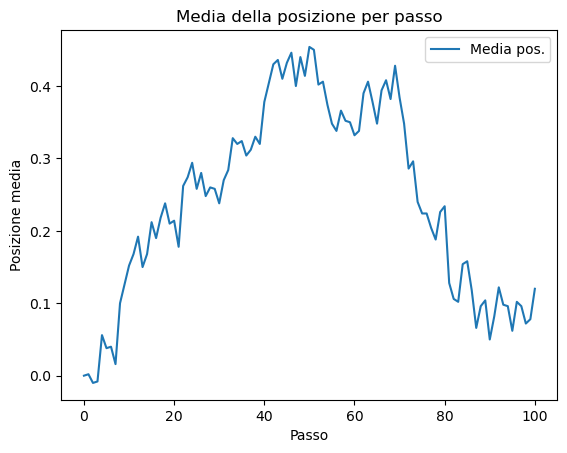

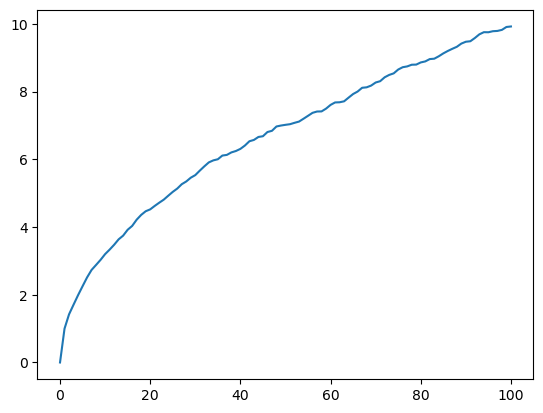

In [53]:
## Esercizio 2
import numpy as np
import matplotlib.pyplot as plt
def randomWalk(passi):
    camminata = np.random.choice([-1,1], passi)
    position = np.insert(np.cumsum(camminata), 0, 0) 

    return position

np.random.seed(0)

walkTest = randomWalk(10)
#print(walkTest)



    
    


""" 1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. 
Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard 
della posizione ad ogni passo degli N camminatori.


 """
def multipleWalk(camminatori, passi):
        walks = np.array([randomWalk(passi) for _ in range(camminatori)])
        
        meanPos = np.mean(walks, axis=0)
        stdPos = np.std(walks, axis= 0)
        
        return meanPos, stdPos
    

mean, std = multipleWalk(1000, 100)

plt.plot(mean, label='Media pos.')
plt.xlabel("Passo")
plt.ylabel("Posizione media")
plt.title("Media della posizione per passo")
plt.legend()
plt.show()

    
    
    
    

""" 3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? 
Che andamento ha la deviazione standard rispeto l tempo/passi? """


plt.plot(std, label="Std")

## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [ ]:
import numpy as np

np.random.seed(42)

a = np.random.normal(0,1, size=(5,9))

print(a.shape)
list = np.array

""" for i in range(9):
    for j in range(5): """
        

(5, 9)


' for i in range(5):\n    for j in range(9): '

## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


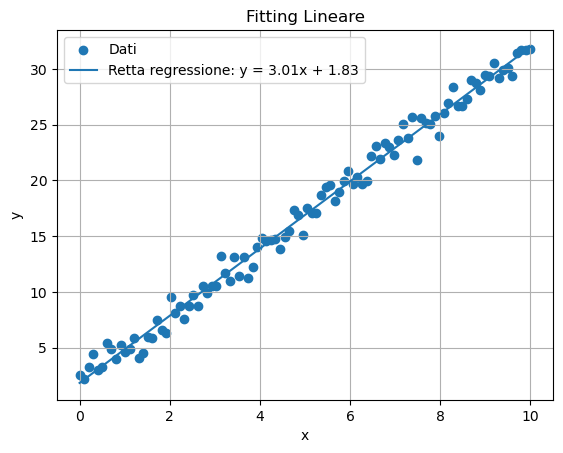

In [63]:
import numpy as np
import matplotlib as plt
from scipy.optimize import curve_fit

np.random.seed(42)

x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 1, 100)


def linear_func(x, a, b):
        return a * x + b
    
def fit_line(x,y):
        params, _ = curve_fit(linear_func, x, y)
        a,b = params
        description = f"y = {a:.2f}x + {b:.2f}"
        return a,b, description
    
    
    
# Fix the matplotlib import
import matplotlib.pyplot as plt

# Get the fitted parameters
a, b, description = fit_line(x, y)

# Create the scatter plot
plt.scatter(x, y, label="Dati")

# Plot the regression line correctly
plt.plot(x, linear_func(x, a, b), label=f"Retta regressione: {description}")

plt.title("Fitting Lineare")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
    
     
